# **Keras Functional API**

**A way to create models** that are more flexible than the **_keras.Sequential API_**. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

In [1]:
import numpy as np
import keras
from keras import layers
from keras import ops

The m**ain idea is that a deep learning model** is usually a directed acyclic **graph (DAG) of layers**. So the functional API is a way to **build graphs of layers**.

**Architecture:**

Input: 784-dimensional vectors  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
[Dense (64 units, ReLU activation)]  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
[Dense (64 units, ReLU activation)]  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
[Dense (10 units, Softmax activation)]  
&nbsp;&nbsp;&nbsp;&nbsp;↓  
Output: logits of a probability distribution over 10 classes


This is a **basic graph with three layers**.

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
inputs.shape

(None, 784)

In [4]:
inputs.dtype

'float32'

In [5]:
dense = layers.Dense(64, activation='relu')
x = dense(inputs)

The **"layer call"** action is like **drawing an arrow from "inputs"** to this layer you created. You're **"passing" the inputs** to the **dense layer**, and you **get x as the output**.

In [6]:
# Let's add a few more layers to the graph of layers:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

At this point, you **can create a Model** by **specifying its inputs and outputs** in the **graph of layers**:

In [7]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [8]:
model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

You can also **plot the model as a graph**:

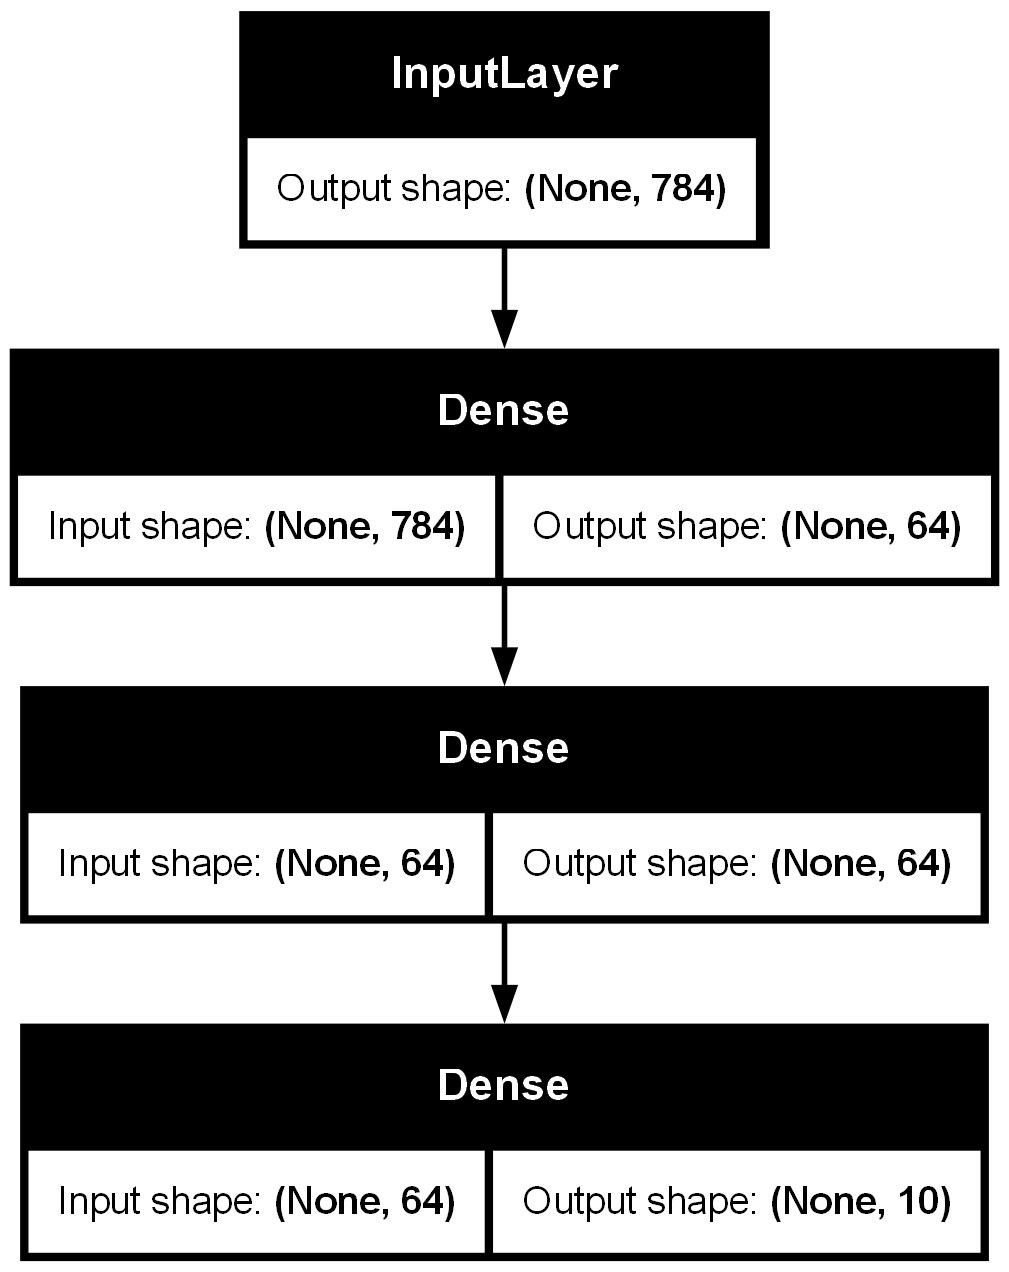

In [10]:
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

A **"graph of layers"** is an **intuitive mental image** for a **deep learning model**, and the **functional API** is a way to create models that closely mirrors this.

## **Training, evaluation, and inference**

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9020 - loss: 0.3490 - val_accuracy: 0.9382 - val_loss: 0.2156
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9504 - loss: 0.1671 - val_accuracy: 0.9562 - val_loss: 0.1468
313/313 - 1s - 2ms/step - accuracy: 0.9565 - loss: 0.1383
Test loss: 0.13825015723705292
Test accuracy: 0.9564999938011169


## **Save and serialize**

**Saving the model and serialization** work the same way for models built using the **functional API as they do for Sequential models**. The standard way to save a functional model is to call **_model.save()_** to **save the entire model as a single file**. You can later recreate the same model from this file, even if the code that built the model is no longer available.

In [12]:
model.save("my_model.keras")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("my_model.keras")

### Use the same graph of layers to define multiple models
